#Section 3: Convolutional Neural Networks (CNNs)


In [1]:
'''first, let's import libraries '''

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Conv2DTranspose

1) Our first CNN (Classification Problem) - Hand Written Digit Recognition


In [2]:
from keras.datasets import mnist

# data is already randomized and split in to training / test sets. So we can go ahead and use them as it is.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


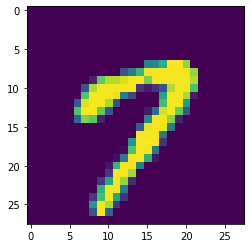

Corresponding Y value: 7


In [3]:
# Let's plot a sample image and print corresponding output

plt.imshow(x_train[15, :, :])
plt.show()

print('Corresponding Y value: ' + str(y_train[15]))


In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
# one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# And let's print new sizes of input and output variables

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000, 10)
X_test shape (10000, 28, 28, 1)
y_test shape (10000, 10)


In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1))) # 32 convolution filters
model.add(MaxPooling2D(pool_size=(2, 2))) # reducing width and height by 1/2 with max pooling
model.add(Conv2D(64, kernel_size=3, activation='relu')) # 64 convolution filters
model.add(MaxPooling2D(pool_size=(2, 2))) # reducing width and height by 1/2 with max pooling
model.add(Conv2D(64, kernel_size=3, activation='relu')) # 64 convolution filters

model.add(Flatten())
model.add(Dense(10, activation='softmax')) # 10 units corresponding to 10 classes of digits

# since this is a classification problem, cross-entropy is better as a loss.
model.compile(optimizer='adam', loss='categorical_crossentropy') 

# this will print details of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=1000, verbose=0)


#Train and Text Validation 

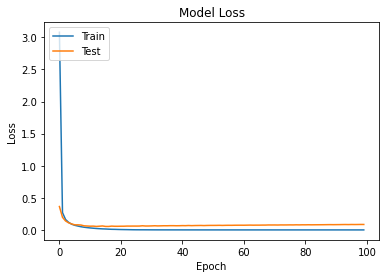

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
'''Prediction over the test dataset'''
pred_test = model.predict(x_test)

#let's compare random predicted and actual y values 
print('Predicted: '+str(np.round(pred_test[15]))+', Actual: '+str(y_test[15]))

Predicted: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Actual: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
